In [1]:
from PIL import Image
import h5py
# import anubisPlotUtils as anPlot
import json
import numpy as np
import os
import hist as hi
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
matplotlib.use('TkAgg')  # or 'Qt5Agg', 'GTK3Agg', etc.
import mplhep as hep
hep.style.use([hep.style.ATLAS])
import sys
# import ANUBIS_triggered_functions as ANT
import pandas as pd
import matplotlib.backends.backend_pdf
from matplotlib.ticker import MultipleLocator
import plotly
import plotly.graph_objs as go
import plotly.express as px
from functools import reduce
import matplotlib.pyplot as plt
import numpy as np
# from scipy.stats import normpip install pillow
sys.path.insert(1, 'Osiris Temp\processing\python')
import Analysis_tools as aTools
import rawFileReader
import csv
from itertools import groupby
import math
from scipy.optimize import curve_fit

import importlib
%matplotlib inline
from collections import defaultdict
import cProfile
import pstats
import io
import functools


<>:26: SyntaxWarning: invalid escape sequence '\p'
<>:26: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Peter\AppData\Local\Temp\ipykernel_36972\1527275736.py:26: SyntaxWarning: invalid escape sequence '\p'
  sys.path.insert(1, 'Osiris Temp\processing\python')


In [2]:
def debug_decorator(processedEvents):
    def inner_decorator(func):
        @functools.wraps(func)
        def wrapper(*args, **kwargs):
            result = func(*args, **kwargs)
            insertion_list = result
            if insertion_list != [0, 0, 0, 0, 0]:
                print(f'New alignment, Event chunk {processedEvents}, insertions {insertion_list}, Updates: {args[0]}')
            return result
        return wrapper
    return inner_decorator


In [9]:

importlib.reload(rawFileReader)

interval = 100
file_path = '../Data/Fixed.raw'
fReader = rawFileReader.fileReader(file_path)
order = [[0, 1], [1, 2], [2, 3], [3, 4]]
max_process_event_chunk = 10000
processedEvents = 0

mets = [[] for _ in range(len(order))]

original_ConstructEventInsertionList = aTools.ConstructEventInsertionList

while processedEvents < max_process_event_chunk:
    processedEvents += 1
    aTools.ConstructEventInsertionList = debug_decorator(processedEvents)(original_ConstructEventInsertionList)
    evt_chunk = fReader.get_aligned_events(order=order, interval=interval)
    if evt_chunk != None:
        for idx, item in enumerate(order):
                i, j = item
                x, y, l, m = aTools.find_tdc_alignment_metric(i, j)
                AM = aTools.calcAvgAlign(evt_chunk, offSet=0, i=x, j=y, k=l, l=m, tdc1=i, tdc0=j, processedEvents=0, skipChans=[0])
                mets[idx].append(AM)

aTools.ConstructEventInsertionList = original_ConstructEventInsertionList


New alignment, Event chunk 1, insertions [0, 0, 0, 1, 3], Updates: [0, 0, -1, -2]
New alignment, Event chunk 3, insertions [0, 4, 8, 8, 8], Updates: [-4, -4, 0, 0]
New alignment, Event chunk 7, insertions [0, 0, 1, 1, 1], Updates: [0, -1, 0, 0]
New alignment, Event chunk 18, insertions [1, 1, 0, 1, 1], Updates: [0, 1, -1, 0]
New alignment, Event chunk 19, insertions [1, 1, 1, 1, 0], Updates: [0, 0, 0, 1]
New alignment, Event chunk 30, insertions [0, 0, 1, 0, 1], Updates: [0, -1, 1, -1]
New alignment, Event chunk 38, insertions [0, 1, 0, 0, 0], Updates: [-1, 1, 0, 0]
New alignment, Event chunk 45, insertions [0, 0, 1, 1, 1], Updates: [0, -1, 0, 0]
New alignment, Event chunk 46, insertions [1, 1, 0, 0, 0], Updates: [0, 1, 0, 0]
New alignment, Event chunk 73, insertions [0, 0, 0, 1, 0], Updates: [0, 0, -1, 1]
New alignment, Event chunk 77, insertions [1, 1, 1, 0, 0], Updates: [0, 0, 1, 0]
New alignment, Event chunk 78, insertions [0, 1, 1, 1, 2], Updates: [-1, 0, 0, -1]
New alignment, Eve

<>:30: SyntaxWarning: invalid escape sequence '\s'
<>:30: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Peter\AppData\Local\Temp\ipykernel_36972\2165373107.py:30: SyntaxWarning: invalid escape sequence '\s'
  ax.set_ylabel('Average $\sqrt{d\eta^2+d\phi^2}$')


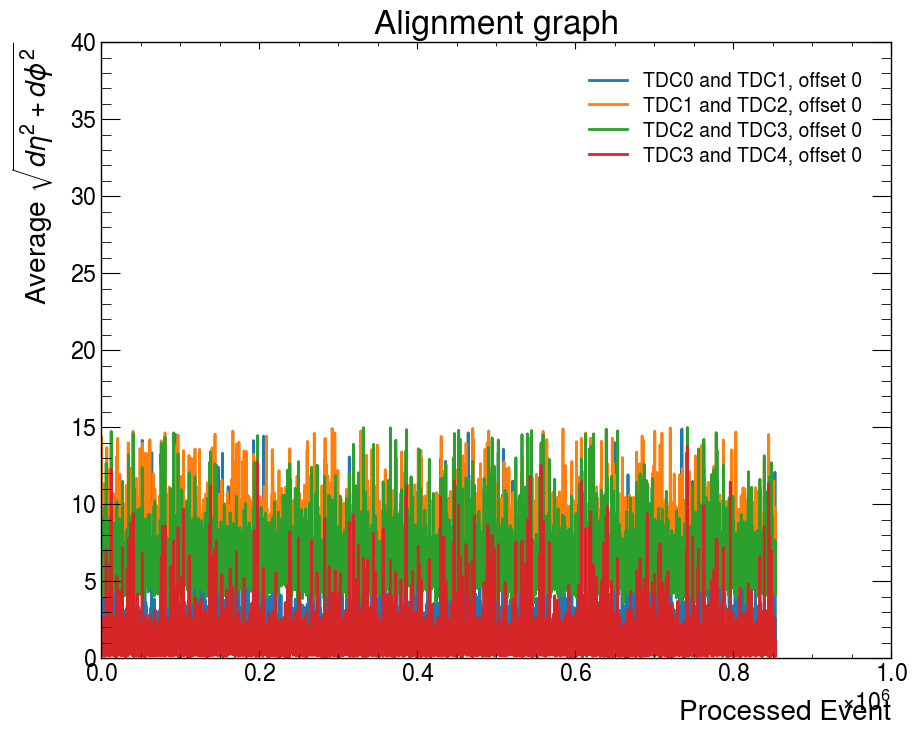

In [10]:
plot_range = [0, 0]
fig, ax = plt.subplots(figsize=(10, 8))

for idx, item in enumerate(order):
    if plot_range == [0, 0]:
        met = mets[idx]
        i, j = item
        binsx = [x * interval for x in range(len(met))]
        ax.plot(binsx, met, label=f'TDC{i} and TDC{j}, offset 0')
    else:
        start_idx = int(plot_range[0] / interval)
        end_idx = int(plot_range[1] / interval)
        if start_idx < 0 or end_idx > len(mets[idx]):
            print(f"Invalid range for idx {idx}: start {start_idx}, end {end_idx}, length {len(mets[idx])}")
            continue
        
        met = mets[idx][start_idx:end_idx]
        i, j = item
        binsx = [plot_range[0] + x * interval for x in range(len(met))]
        ax.plot(binsx, met, label=f'TDC{i} and TDC{j}, offset 0')

if plot_range == [0, 0]:
    ax.set_xlim(0, max_process_event_chunk * interval)
else:
    ax.set_xlim(plot_range[0], plot_range[1])

ax.set_ylim(0, 40)
ax.legend()
ax.set_title('Alignment graph')
ax.set_ylabel('Average $\sqrt{d\eta^2+d\phi^2}$')
ax.set_xlabel('Processed Event')
plt.show()

In [6]:
print(mets)

[1.4659494029519937, 7.909718913016746, 5.961021088700804, 1.5833333333333333, 1.0388008481016893, 8.949033072929996, 6.0889298826175375, 0.6923076923076923, 0.41462413243745466, 14.402804603390782, 6.273143250054237, 0.5849056603773585, 1.4739528052345585, 8.52182145173194, 5.2241475423932675, 0.8627450980392157, 0.9428501036461557, 8.062728953917624, 5.787344517381959, 0.6530612244897959, 0.9069767441860465, 8.3153911433495, 5.874789680401987, 0.23529411764705882, 1.2302478566101822, 7.621373251245832, 5.016318574661358, 0.2982456140350877, 1.4535003940715596, 9.860210757450456, 5.014034796440015, 0.16981132075471697, 1.591629109320561, 7.685013163161136, 5.370288902856389, 0.34831460674157305, 1.361937327866833, 8.473055706085963, 9.118644292526762, 1.703125, 2.8582230043356405, 8.459951827871363, 6.599184793206281, 1.04, 2.6612945460121953, 8.000878304009573, 8.345133635820329, 1.0909090909090908, 0.7904889881932542, 6.944497324609298, 8.281202716824783, 0.44, 0.5645422476710846, 8